In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
sns.set_context('talk')

About the Results
- Gender percentage is balanced.
- Women have greater variability in sleep efficiency, having a slightly lower ability to achieve efficient sleep compared to men, who have a higher level of efficiency and less variability in the category.
- Individuals with a low percentage of deep sleep have lower sleep efficiency, while those who spend more than half of their time sleeping in deep sleep have better efficiency.
- Those who have less time with light sleep have more efficiency.
- Non-smokers have a higher level of sleep efficiency, with low variability compared to smokers, who have levels of sleep efficiency below 0.6.

# Visualizing the data

In [3]:
sleep_df= pd.read_csv("Sleep_Efficiency.csv", sep=',')
sleep_df

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,448,27,Female,2021-11-13 22:00:00,2021-11-13 05:30:00,7.5,0.91,22,57,21,0.0,0.0,0.0,No,5.0
448,449,52,Male,2021-03-31 21:00:00,2021-03-31 03:00:00,6.0,0.74,28,57,15,4.0,25.0,0.0,No,3.0
449,450,40,Female,2021-09-07 23:00:00,2021-09-07 07:30:00,8.5,0.55,20,32,48,1.0,NaN,3.0,Yes,0.0
450,451,45,Male,2021-07-29 21:00:00,2021-07-29 04:00:00,7.0,0.76,18,72,10,3.0,0.0,0.0,No,3.0


- The definition of the column "Exercise frequency" is not clear;

# Cleaning 

- Changing the names of the columns for practicality, removing the spaces between words;

In [4]:
sleep_df.rename(columns={'Wakeup time': 'WakeupTime'}, inplace = True)
sleep_df.rename(columns={'Sleep duration': 'SleepDuration'}, inplace = True)
sleep_df.rename(columns={'Sleep efficiency': 'SleepEfficiency'}, inplace = True)
sleep_df.rename(columns={'REM sleep percentage': 'REMsleepPercentage'}, inplace = True)
sleep_df.rename(columns={'Deep sleep percentage': 'DeepSleepPercentage'}, inplace = True)
sleep_df.rename(columns={'Light sleep percentage': 'LightSleepPercentage'}, inplace = True)
sleep_df.rename(columns={'Caffeine consumption': 'CaffeineConsumption'}, inplace = True)
sleep_df.rename(columns={'Alcohol consumption': 'AlcoholConsumption'}, inplace = True)
sleep_df.rename(columns={'Smoking status': 'SmokingStatus'}, inplace = True)
sleep_df.rename(columns={'Exercise frequency': 'ExerciseFrequency'}, inplace = True)

- Getting the percentage of null lines;

In [5]:
sleep_df.isna().sum()/sleep_df.shape[0]

ID                      0.000000
Age                     0.000000
Gender                  0.000000
Bedtime                 0.000000
WakeupTime              0.000000
SleepDuration           0.000000
SleepEfficiency         0.000000
REMsleepPercentage      0.000000
DeepSleepPercentage     0.000000
LightSleepPercentage    0.000000
Awakenings              0.044248
CaffeineConsumption     0.055310
AlcoholConsumption      0.030973
SmokingStatus           0.000000
ExerciseFrequency       0.013274
dtype: float64

- Removing the ID column, the individual numbers of the subjects was irrelevant.

In [6]:
sleep_df = sleep_df.drop(columns=['ID'])

In [7]:
sleep_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   452 non-null    int64  
 1   Gender                452 non-null    object 
 2   Bedtime               452 non-null    object 
 3   WakeupTime            452 non-null    object 
 4   SleepDuration         452 non-null    float64
 5   SleepEfficiency       452 non-null    float64
 6   REMsleepPercentage    452 non-null    int64  
 7   DeepSleepPercentage   452 non-null    int64  
 8   LightSleepPercentage  452 non-null    int64  
 9   Awakenings            432 non-null    float64
 10  CaffeineConsumption   427 non-null    float64
 11  AlcoholConsumption    438 non-null    float64
 12  SmokingStatus         452 non-null    object 
 13  ExerciseFrequency     446 non-null    float64
dtypes: float64(6), int64(4), object(4)
memory usage: 49.6+ KB


- Changing the types of the columns declared as object;

In [8]:
sleep_df.Gender = sleep_df.Gender.astype('category')
sleep_df.Bedtime = sleep_df.Bedtime.astype('category')
sleep_df.WakeupTime = sleep_df.WakeupTime.astype('category')
sleep_df.SmokingStatus = sleep_df.SmokingStatus.astype('category')
sleep_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Age                   452 non-null    int64   
 1   Gender                452 non-null    category
 2   Bedtime               452 non-null    category
 3   WakeupTime            452 non-null    category
 4   SleepDuration         452 non-null    float64 
 5   SleepEfficiency       452 non-null    float64 
 6   REMsleepPercentage    452 non-null    int64   
 7   DeepSleepPercentage   452 non-null    int64   
 8   LightSleepPercentage  452 non-null    int64   
 9   Awakenings            432 non-null    float64 
 10  CaffeineConsumption   427 non-null    float64 
 11  AlcoholConsumption    438 non-null    float64 
 12  SmokingStatus         452 non-null    category
 13  ExerciseFrequency     446 non-null    float64 
dtypes: category(4), float64(6), int64(4)
memory usage: 77.4 KB

In [9]:
sleep_df

,Age,Gender,Bedtime,WakeupTime,SleepDuration,SleepEfficiency,REMsleepPercentage,DeepSleepPercentage,LightSleepPercentage,Awakenings,CaffeineConsumption,AlcoholConsumption,SmokingStatus,ExerciseFrequency
0,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,27,Female,2021-11-13 22:00:00,2021-11-13 05:30:00,7.5,0.91,22,57,21,0.0,0.0,0.0,No,5.0
448,52,Male,2021-03-31 21:00:00,2021-03-31 03:00:00,6.0,0.74,28,57,15,4.0,25.0,0.0,No,3.0
449,40,Female,2021-09-07 23:00:00,2021-09-07 07:30:00,8.5,0.55,20,32,48,1.0,NaN,3.0,Yes,0.0
450,45,Male,2021-07-29 21:00:00,2021-07-29 04:00:00,7.0,0.76,18,72,10,3.0,0.0,0.0,No,3.0


# EDA

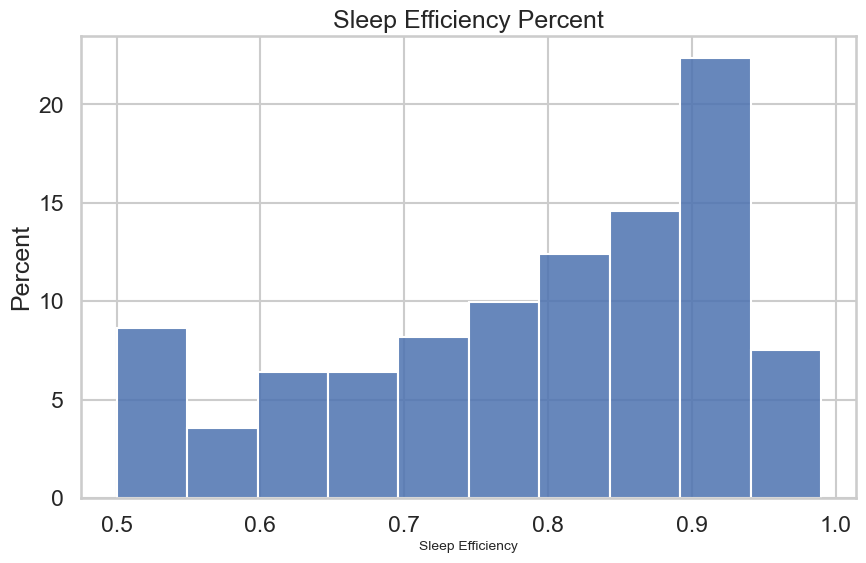

In [10]:
plt.figure(figsize=(10,6))
sns.histplot(x='SleepEfficiency', data = sleep_df, alpha=0.85, stat="percent")
plt.xlabel('Sleep Efficiency', size=10)
plt.title('Sleep Efficiency Percent')
plt.show()

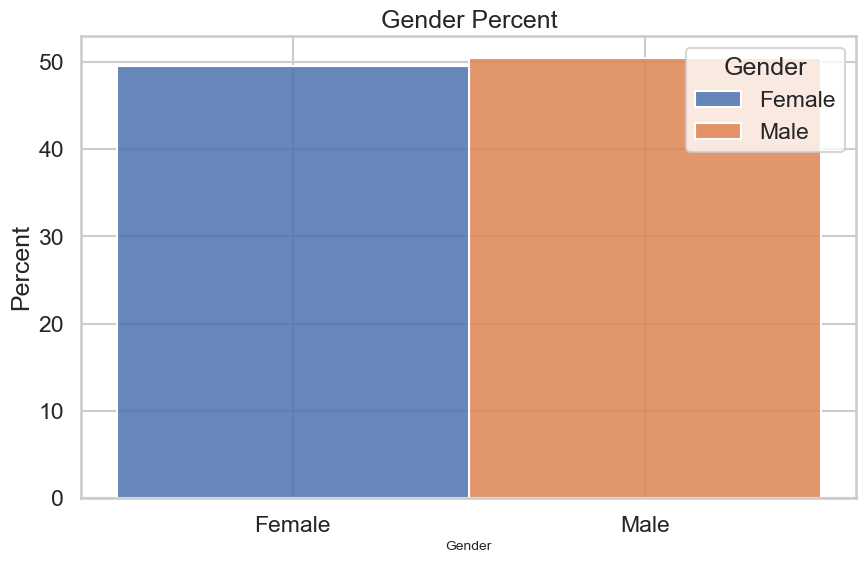

In [11]:
plt.figure(figsize=(10,6))
sns.histplot(x='Gender', data = sleep_df,hue= 'Gender', alpha=0.85, stat="percent")
plt.xlabel('Gender', size=10)
plt.title('Gender Percent')
plt.show()

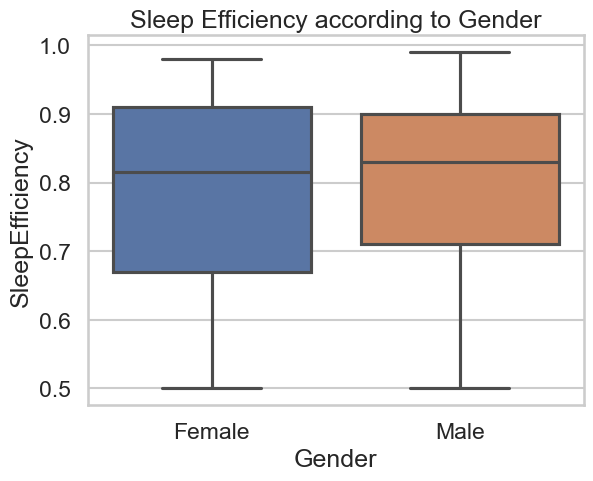

In [12]:
sns.boxplot(data= sleep_df, x="Gender", y ="SleepEfficiency", orient="v").set_title('Sleep Efficiency according to Gender')
plt.show()

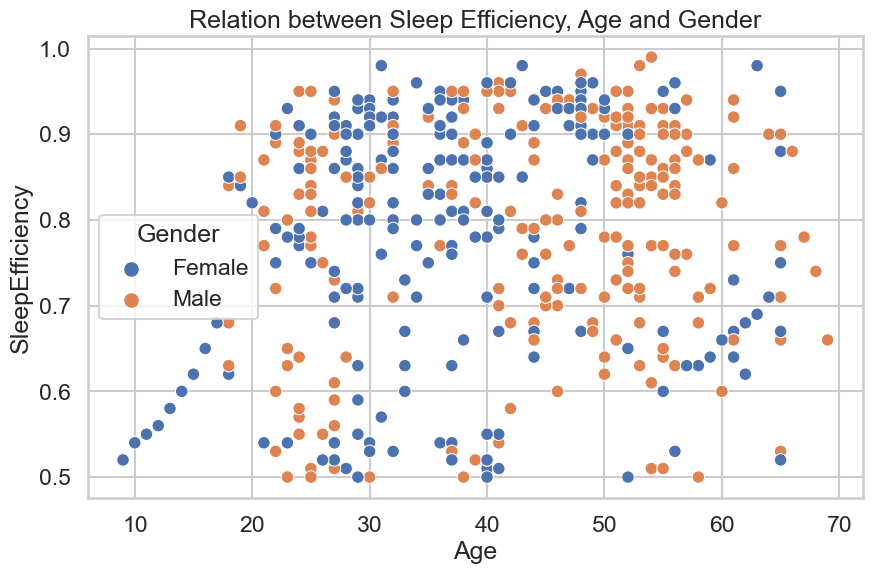

In [13]:
plt.figure(figsize=(10,6))
sns.scatterplot( data = sleep_df, x='Age', y = 'SleepEfficiency', hue = 'Gender')
plt.title('Relation between Sleep Efficiency, Age and Gender')
plt.show()

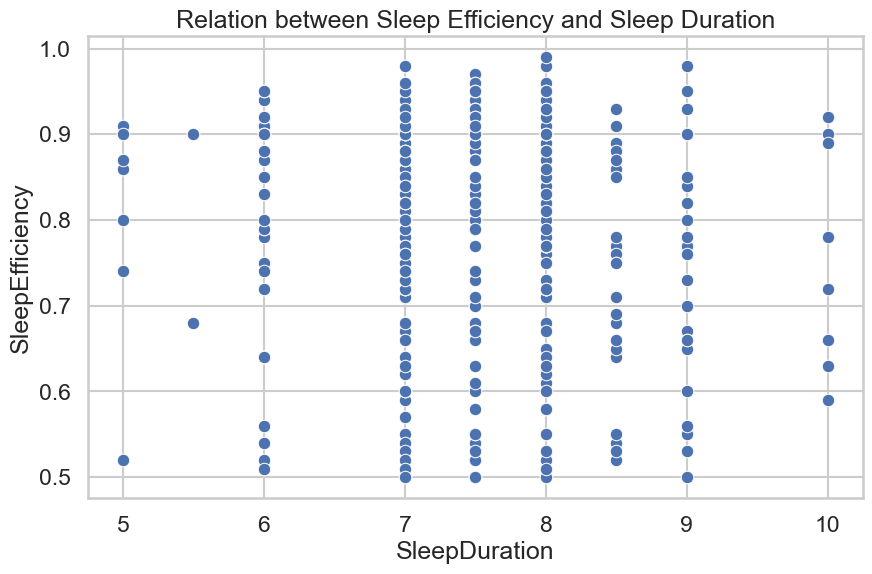

In [14]:
plt.figure(figsize=(10,6))
sns.scatterplot( data = sleep_df, x='SleepDuration', y = 'SleepEfficiency')
plt.title('Relation between Sleep Efficiency and Sleep Duration')
plt.show()

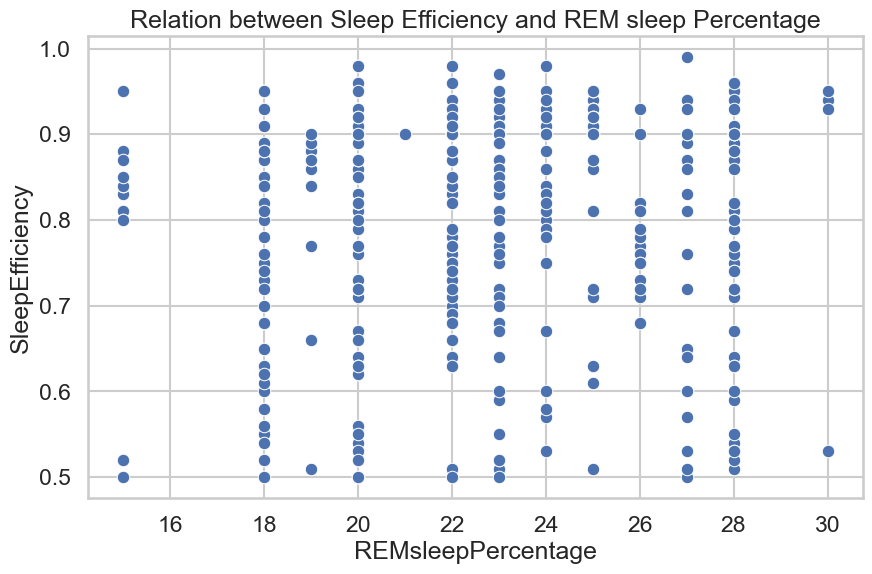

In [15]:
plt.figure(figsize=(10,6))
sns.scatterplot( data = sleep_df, x='REMsleepPercentage', y = 'SleepEfficiency')
plt.title('Relation between Sleep Efficiency and REM sleep Percentage')
plt.show()

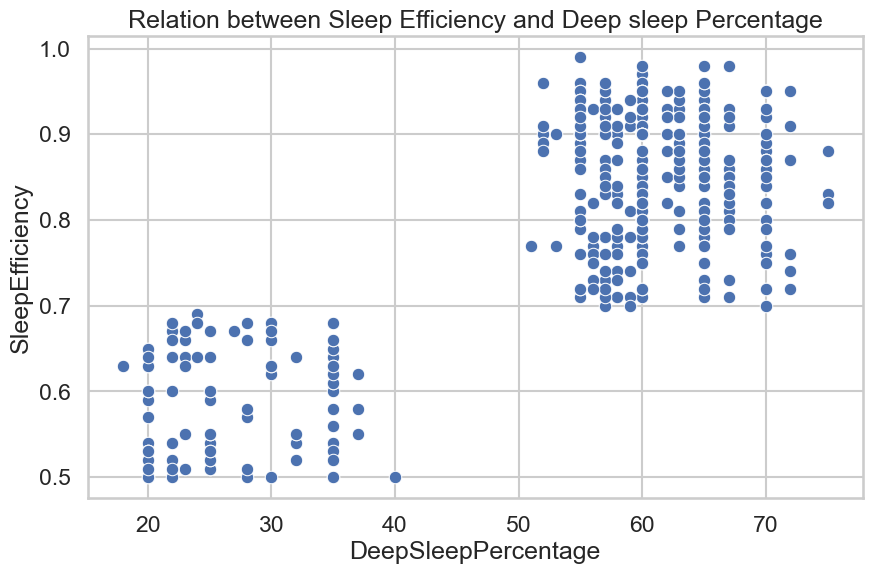

In [16]:
plt.figure(figsize=(10,6))
sns.scatterplot( data = sleep_df, x='DeepSleepPercentage', y = 'SleepEfficiency')
plt.title('Relation between Sleep Efficiency and Deep sleep Percentage')
plt.show()

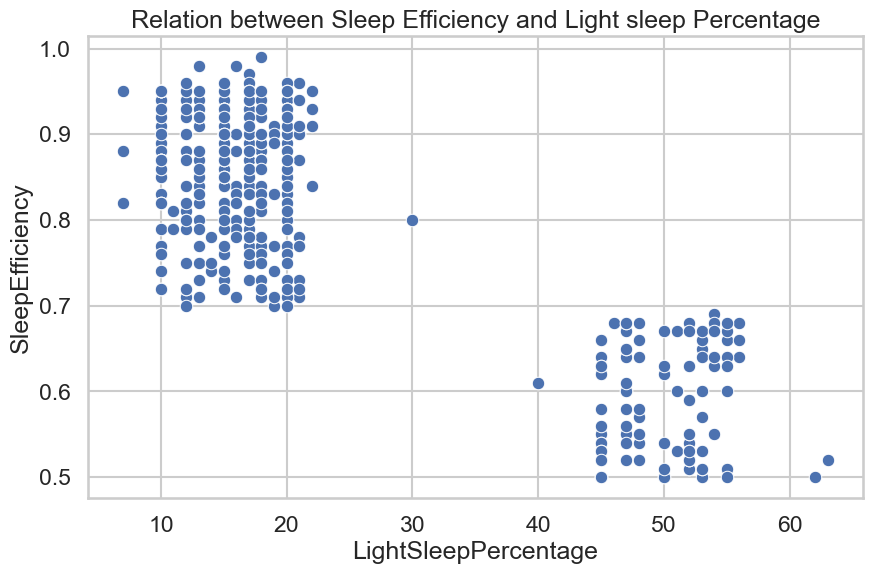

In [17]:
plt.figure(figsize=(10,6))
sns.scatterplot( data = sleep_df, x='LightSleepPercentage', y = 'SleepEfficiency')
plt.title('Relation between Sleep Efficiency and Light sleep Percentage')
plt.show()

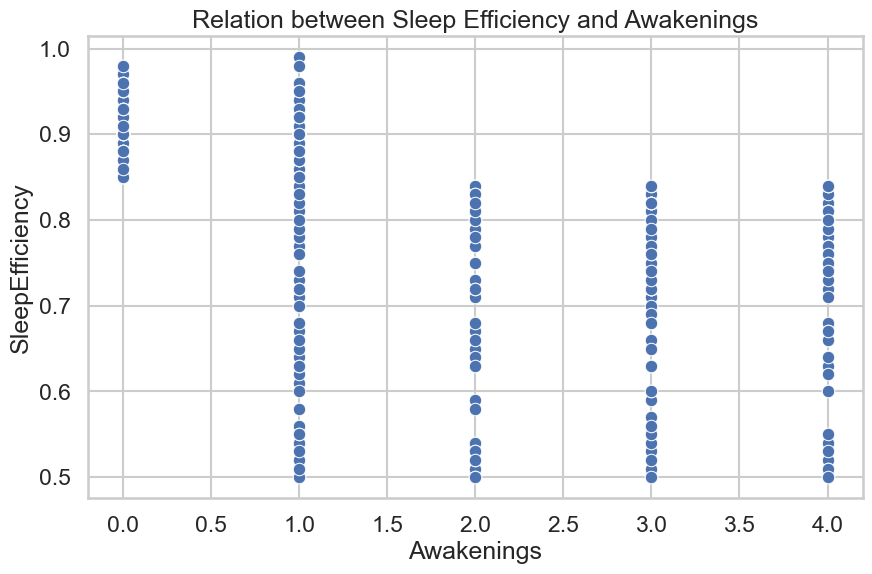

In [18]:
plt.figure(figsize=(10,6))
sns.scatterplot( data = sleep_df, x='Awakenings', y = 'SleepEfficiency')
plt.title('Relation between Sleep Efficiency and Awakenings')
plt.show()

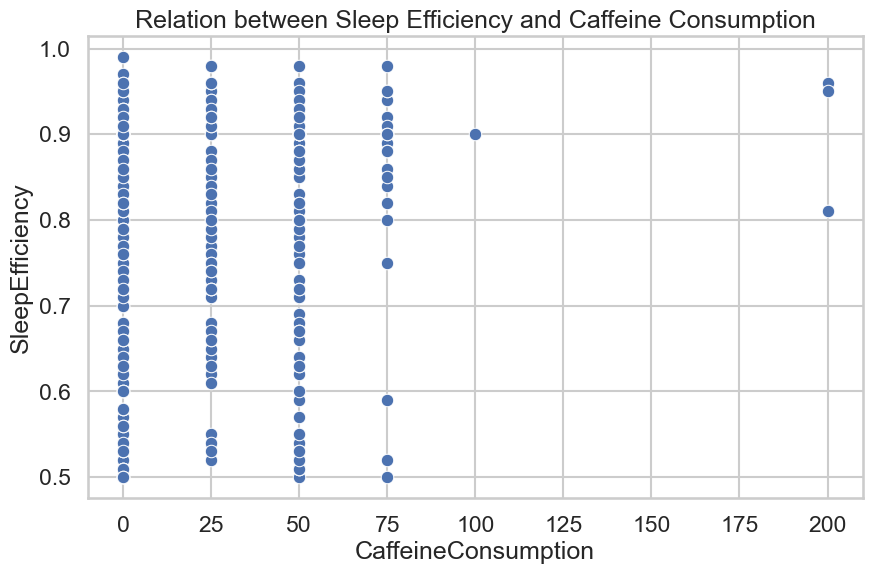

In [19]:

plt.figure(figsize=(10,6))
sns.scatterplot( data = sleep_df, x='CaffeineConsumption', y = 'SleepEfficiency')
plt.title('Relation between Sleep Efficiency and Caffeine Consumption')
plt.show()

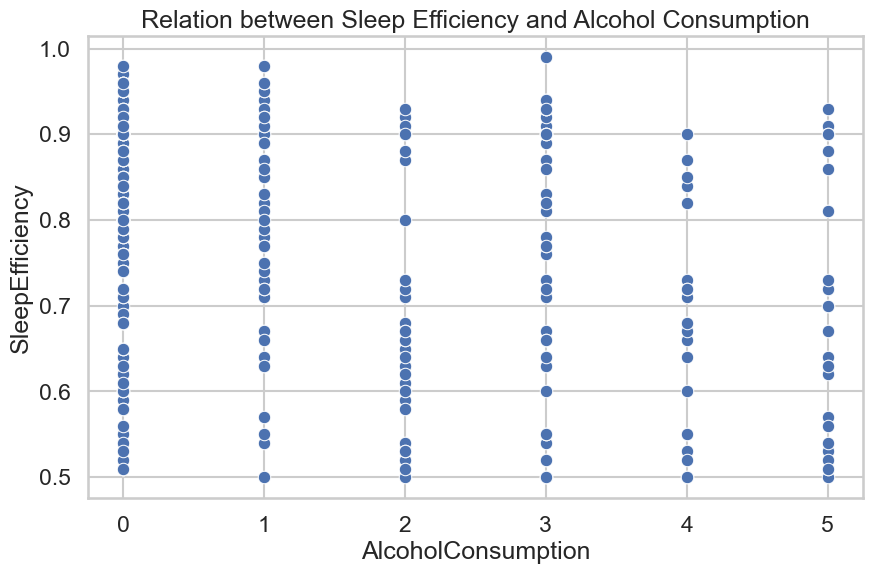

In [20]:
plt.figure(figsize=(10,6))
sns.scatterplot( data = sleep_df, x='AlcoholConsumption', y = 'SleepEfficiency')
plt.title('Relation between Sleep Efficiency and Alcohol Consumption')
plt.show()

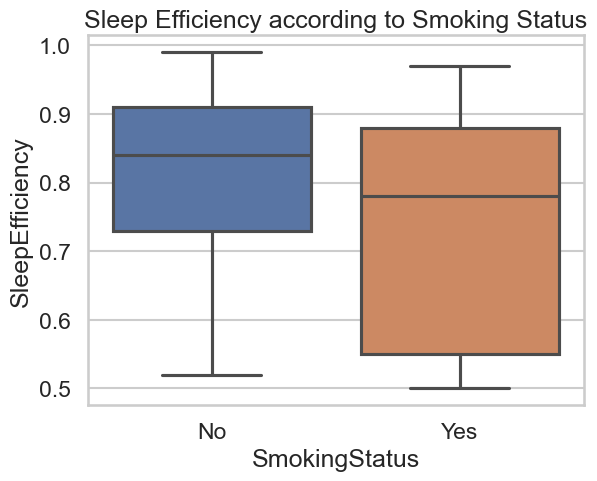

In [21]:
sns.boxplot(data= sleep_df, x="SmokingStatus", y ="SleepEfficiency", orient="v").set_title('Sleep Efficiency according to Smoking Status')
plt.show()

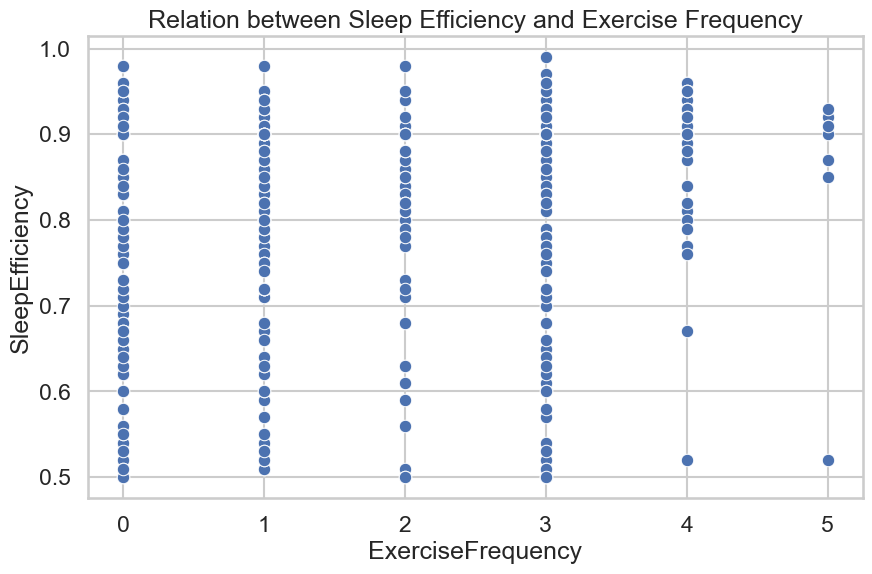

In [22]:
plt.figure(figsize=(10,6))
sns.scatterplot( data = sleep_df, x='ExerciseFrequency', y = 'SleepEfficiency')
plt.title('Relation between Sleep Efficiency and Exercise Frequency')
plt.show()